# Figure with noise: data processing

In [1]:
import pennylane as qml
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from pennylane import numpy as np
from scipy.sparse.linalg import eigsh
from openfermion.linalg import get_ground_state
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format ="retina"
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 120
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
# DEFINITION OF FUNCTIONS

def Ising_Hamiltonian_qml(J,g,N):
    '''
    Ising Hamiltonian with a transverse field (pennylane notation):
    H = J * sum_{i,j} Z^i Z^(i+1) + g * sum_i X^i
    ...

    Parameters
    -------
    J : float
        Strenght of the interaction.
    g : float
        Strenght of the transverse magnetic field.
    '''
    
    H = g*qml.PauliZ(N-1) 
    for i in range(0,N-1):
        H = H+ g*qml.PauliZ(i)+J*qml.PauliX(i)@qml.PauliX(i+1)
    #H = H + J*qml.PauliX(N-1)@qml.PauliX(0)

    return H

## Loading the data

First we load the data.

In [3]:
import pickle

params_history_list = []
energy_history_list = []
grad_list_history = []
final_energy_list = []
final_params_list = []
final_iterations_list = []

N = 8
layers = [i for i in range(1,int(2*N/2)+1)]
#ms = [6,25,7,5]
ms=[5*N for _ in range(1,N+1)]
max_iter = 1000

path = '/home/ctabares/variational_long_range-main/paper/data/figure1_def/figure1/'
names = ['params_history_list','energy_history_list']
#names = ['params_history_list','energy_history_list',
#        'final_energy_list','final_params_list','final_iterations_list']
gates = ['global_adiab','brick-cnot_adiab_finrot','brick-cz_adiab_finrot','hea-cnot_adiab','hea-cz_adiab','HVA_adiab','global_all-to-all_adiab']
values = [params_history_list,energy_history_list]

for layer,m in zip(layers,ms):
    params_history_list_layer = []
    energy_history_list_layer = []

    values_layer = [params_history_list_layer,energy_history_list_layer]
    for gate in gates:
        
        full_name = gate+('_N={}_layers={}_parameters={}_max-iter={}.p'.format(N,layer,m,max_iter))
        for name,value in zip(names,values_layer):
            with open(path+name+'_'+full_name,'rb') as fp:
                value.append(pickle.load(fp))

    #for value in values_layer[-1]:
        #value[0] = [item for sublist in value[0] for item in sublist]

    for value_layer,value_tot in zip(values_layer,values):
        value_tot.append(value_layer)
    

In [4]:
energy_vec_global_layers = []
energy_vec_global_all_to_all_layers = []
energy_vec_hva_layers = []
energy_vec_brick_cnot_layers = []
energy_vec_brick_cz_layers = []
energy_vec_hea_cnot_layers = []
energy_vec_hea_cz_layers = []

pos_vec_global_layers = []
params_opt_global_layers = []
pos_vec_global_all_to_all_layers = []
params_opt_global_all_to_all_layers = []
pos_vec_hva_layers = []
params_opt_hva_layers = []
pos_vec_brick_cnot_layers = []
params_opt_brick_cnot_layers = []
pos_vec_brick_cz_layers = []
params_opt_brick_cz_layers = []
pos_vec_hea_cnot_layers = []
params_opt_hea_cnot_layers = []
pos_vec_hea_cz_layers = []
params_opt_hea_cz_layers = []
j=0


for layer in np.arange(1,2*N/2+1):
    
    energy_vec_global = []
    energy_vec_global_all_to_all = []
    energy_vec_hva = []
    energy_vec_brick_cnot = []
    energy_vec_brick_cz = []
    energy_vec_hea_cnot = []
    energy_vec_hea_cz = []

    pos_vec_global = []
    params_opt_global = []
    pos_vec_global_all_to_all = []
    params_opt_global_all_to_all = []
    pos_vec_hva = []
    params_opt_hva = []
    pos_vec_brick_cnot = []
    params_opt_brick_cnot = []
    pos_vec_brick_cz = []
    params_opt_brick_cz = []    
    pos_vec_hea_cnot = []
    params_opt_hea_cnot = []
    pos_vec_hea_cz = []
    params_opt_hea_cz = []

    i=-1
    energy_vec_global.append(float(min(energy_history_list[j][0][i][0])))
    energy_vec_global_all_to_all.append(float(min(energy_history_list[j][6][i][0])))
    energy_vec_hva.append(float(min(energy_history_list[j][5][i][0])))
    energy_vec_brick_cnot.append(float(min(energy_history_list[j][1][i][0])))
    energy_vec_brick_cz.append(float(min(energy_history_list[j][2][i][0])))
    energy_vec_hea_cnot.append(float(min(energy_history_list[j][3][i][0])))
    energy_vec_hea_cz.append(float(min(energy_history_list[j][4][i][0])))


    pos_vec_global.append(energy_history_list[j][0][i][0].index(min(energy_history_list[j][0][i][0])))
    pos_vec_global_all_to_all.append(energy_history_list[j][6][i][0].index(min(energy_history_list[j][6][i][0])))
    pos_vec_hva.append(energy_history_list[j][5][i][0].index(min(energy_history_list[j][5][i][0])))
    pos_vec_brick_cnot.append(energy_history_list[j][1][i][0].index(min(energy_history_list[j][1][i][0])))
    pos_vec_brick_cz.append(energy_history_list[j][2][i][0].index(min(energy_history_list[j][2][i][0])))
    pos_vec_hea_cnot.append(energy_history_list[j][3][i][0].index(min(energy_history_list[j][3][i][0])))
    pos_vec_hea_cz.append(energy_history_list[j][4][i][0].index(min(energy_history_list[j][4][i][0])))


    params_opt_global.append(params_history_list[j][0][i][0][pos_vec_global[i]])
    params_opt_global_all_to_all.append(params_history_list[j][6][i][0][pos_vec_global_all_to_all[i]])
    params_opt_hva.append(params_history_list[j][5][i][0][pos_vec_hva[i]])
    params_opt_brick_cnot.append(params_history_list[j][1][i][0][pos_vec_brick_cnot[i]])
    params_opt_brick_cz.append(params_history_list[j][2][i][0][pos_vec_brick_cz[i]])
    params_opt_hea_cnot.append(params_history_list[j][3][i][0][pos_vec_hea_cnot[i]])
    params_opt_hea_cz.append(params_history_list[j][4][i][0][pos_vec_hea_cz[i]])

    
    j+=1
    energy_vec_global_layers.append(energy_vec_global)    
    energy_vec_global_all_to_all_layers.append(energy_vec_global_all_to_all)    
    energy_vec_hva_layers.append(energy_vec_hva)
    energy_vec_brick_cnot_layers.append(energy_vec_brick_cnot)
    energy_vec_brick_cz_layers.append(energy_vec_brick_cz)
    energy_vec_hea_cnot_layers.append(energy_vec_hea_cnot)
    energy_vec_hea_cz_layers.append(energy_vec_hea_cz)

    pos_vec_global_layers.append(pos_vec_global)
    params_opt_global_layers.append(params_opt_global)    
    pos_vec_global_all_to_all_layers.append(pos_vec_global_all_to_all)
    params_opt_global_all_to_all_layers.append(params_opt_global_all_to_all)  
    pos_vec_hva_layers.append(pos_vec_hva_layers)
    params_opt_hva_layers.append(params_opt_hva)
    pos_vec_brick_cnot_layers.append(pos_vec_brick_cnot)
    params_opt_brick_cnot_layers.append(params_opt_brick_cnot)
    pos_vec_brick_cz_layers.append(pos_vec_brick_cz)
    params_opt_brick_cz_layers.append(params_opt_brick_cz)
    pos_vec_hea_cnot_layers.append(pos_vec_hea_cnot)
    params_opt_hea_cnot_layers.append(params_opt_hea_cnot)
    pos_vec_hea_cz_layers.append(pos_vec_hea_cz)
    params_opt_hea_cz_layers.append(params_opt_hea_cz)

In [5]:
fidelity_global_layers = []
fidelity_global_all_to_all_layers = []
fidelity_hva_layers = []
fidelity_brick_cnot_layers = []
fidelity_brick_cz_layers = []
fidelity_hea_cnot_layers = []
fidelity_hea_cz_layers = []


# OPTIMIZATION: definition of the grid


gamma_list = -np.linspace(0.1,1.0,5*N)

eigenenergies_exact = []
eigenstates_exact = []
max_energy_exact = []

g=1.0
i=0
m=5*N


gamma_pre =gamma_list[0:m][-1]
gamma_in=gamma_pre
H =Ising_Hamiltonian_qml(float(gamma_in),g,N)
H_mat = qml.utils.sparse_hamiltonian(H).real
eigenvalue,eigenstate = get_ground_state(H_mat)
E_exac = float(eigenvalue)
eigenenergies_exact.append(E_exac)
eigenstates_exact.append(eigenstate)
H_max = -1*qml.utils.sparse_hamiltonian(H).real
eigenvalue_max,eigenstate_max = get_ground_state(H_max)
E_max = float(eigenvalue_max)
max_energy_exact.append(-E_max)
for layer in np.arange(1,int(2*N/2)+1):
    fidelity_global = []
    fidelity_global_all_to_all = []
    fidelity_hva = []
    fidelity_hea_cnot = []
    fidelity_hea_cz = []
    fidelity_brick_cnot = []
    fidelity_brick_cz = []
    i=-1
    fidelity_global.append(np.abs(energy_vec_global_layers[layer-1][i]-eigenenergies_exact[i])/(max_energy_exact[i]-eigenenergies_exact[i]))
    fidelity_global_all_to_all.append(np.abs(energy_vec_global_all_to_all_layers[layer-1][i]-eigenenergies_exact[i])/(max_energy_exact[i]-eigenenergies_exact[i]))
    fidelity_hva.append(np.abs(energy_vec_hva_layers[layer-1][i]-eigenenergies_exact[i])/(max_energy_exact[i]-eigenenergies_exact[i]))
    fidelity_hea_cnot.append(np.abs(energy_vec_hea_cnot_layers[layer-1][i]-eigenenergies_exact[i])/(max_energy_exact[i]-eigenenergies_exact[i]))
    fidelity_hea_cz.append(np.abs(energy_vec_hea_cz_layers[layer-1][i]-eigenenergies_exact[i])/(max_energy_exact[i]-eigenenergies_exact[i]))
    fidelity_brick_cnot.append(np.abs(energy_vec_brick_cnot_layers[layer-1][i]-eigenenergies_exact[i])/(max_energy_exact[i]-eigenenergies_exact[i]))
    fidelity_brick_cz.append(np.abs(energy_vec_brick_cz_layers[layer-1][i]-eigenenergies_exact[i])/(max_energy_exact[i]-eigenenergies_exact[i]))

    fidelity_global_layers.append(fidelity_global)
    fidelity_global_all_to_all_layers.append(fidelity_global_all_to_all)
    fidelity_hva_layers.append(fidelity_hva)
    fidelity_hea_cnot_layers.append(fidelity_hea_cnot)
    fidelity_brick_cz_layers.append(fidelity_brick_cz)
    fidelity_brick_cnot_layers.append(fidelity_brick_cnot)
    fidelity_hea_cz_layers.append(fidelity_hea_cz)

final_energy_global = []
final_energy_global_all_to_all = []
final_energy_hva = []
final_energy_hea_cnot = []
final_energy_hea_cz = []
final_energy_brick_cnot = []
final_energy_brick_cz = []

for i in range(int(2*N/2)):
    final_energy_global.append(fidelity_global_layers[i][-1])
    final_energy_global_all_to_all.append(fidelity_global_all_to_all_layers[i][-1])
    final_energy_hva.append(fidelity_hva_layers[i][-1])
    final_energy_hea_cnot.append(fidelity_hea_cnot_layers[i][-1])
    final_energy_hea_cz.append(fidelity_hea_cz_layers[i][-1])
    final_energy_brick_cnot.append(fidelity_brick_cnot_layers[i][-1])
    final_energy_brick_cz.append(fidelity_brick_cz_layers[i][-1])

In [6]:
final_energies = [final_energy_global,final_energy_brick_cnot,final_energy_brick_cz,
                final_energy_hea_cnot,final_energy_hea_cz,final_energy_hva,final_energy_global_all_to_all]

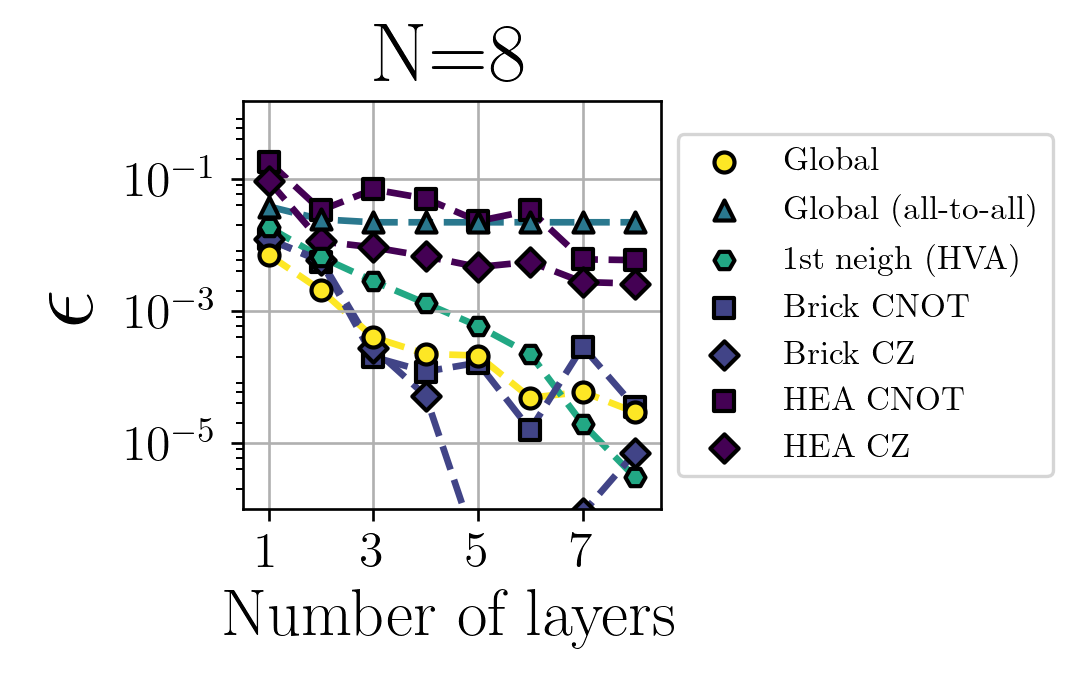

In [7]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(2.25,2.25)
M = 6
colors = plt.cm.viridis(np.linspace(0,1,M))
#colors = sns.color_palette("tab10",as_cmap=True)(np.linspace(0,1,M))
total_layers = np.arange(1,2*N/2+1)
'''
ax.plot(xi_list[0:m],fidelity_hva,label=r'HVA',linewidth=2)
ax.plot(xi_list[0:m],fidelity_cnot,label=r'CNOT gates',linewidth=2)
ax.plot(xi_list[0:m],fidelity_cz,label=r'CZ gates',linewidth=2)
'''
'''
ax.scatter(total_layers,final_energy_hva,label=r'HVA',linewidth=1.25,marker='o',edgecolor='black', facecolor=colors[-1])
ax.plot(total_layers,final_energy_hva,linewidth=2,color=colors[-1],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_energy_cnot,label=r'CNOT',linewidth=1.25,marker='d',edgecolor='black', facecolor=colors[0])
ax.plot(total_layers,final_energy_cnot,linewidth=2,color=colors[0],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_energy_cz,label=r'CZ',linewidth=1.25,marker='D',edgecolor='black', facecolor=colors[1])
ax.plot(total_layers,final_energy_cz,linewidth=2,color=colors[1],linestyle='dashed',zorder=-1)

ax.scatter(total_layers[-1],final_energy_hva[-1],linewidth=1.25,marker='o',edgecolor='black', facecolor='white',alpha=0.65)
ax.scatter(total_layers[-1],final_energy_cnot[-1],linewidth=1.25,marker='d',edgecolor='black', facecolor='white',alpha=0.65)
ax.scatter(total_layers[-1],final_energy_cz[-1],linewidth=1.25,marker='D',edgecolor='black', facecolor='white',alpha=0.65)
'''

ax.scatter(total_layers,final_energy_global,label=r'Global',linewidth=1.25,marker='o',edgecolor='black', facecolor=colors[-1],zorder=10)
ax.plot(total_layers,final_energy_global,linewidth=2,color=colors[-1],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_energy_global_all_to_all,label=r'Global (all-to-all)',linewidth=1.25,marker='^',edgecolor='black', facecolor=colors[-4],zorder=10)
ax.plot(total_layers,final_energy_global_all_to_all,linewidth=2,color=colors[-4],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_energy_hva,label=r'1st neigh (HVA)',linewidth=1.25,marker='H',edgecolor='black', facecolor=colors[-3],zorder=10)
ax.plot(total_layers,final_energy_hva,linewidth=2,color=colors[-3],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_energy_brick_cnot,label=r'Brick CNOT',linewidth=1.25,marker='s',edgecolor='black', facecolor=colors[1],zorder=2)
ax.plot(total_layers,final_energy_brick_cnot,linewidth=2,color=colors[1],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_energy_brick_cz,label=r'Brick CZ',linewidth=1.25,marker='D',edgecolor='black', facecolor=colors[1],zorder=2)
ax.plot(total_layers,final_energy_brick_cz,linewidth=2,color=colors[1],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_energy_hea_cnot,label=r'HEA CNOT',linewidth=1.25,marker='s',edgecolor='black', facecolor=colors[0],zorder=2)
ax.plot(total_layers,final_energy_hea_cnot,linewidth=2,color=colors[0],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_energy_hea_cz,label=r'HEA CZ',linewidth=1.25,marker='D',edgecolor='black', facecolor=colors[0],zorder=2)
ax.plot(total_layers,final_energy_hea_cz,linewidth=2,color=colors[0],linestyle='dashed',zorder=-1)


#ax.scatter(total_layers[-1],final_energy_hva[-1],linewidth=1.25,marker='o',edgecolor='black', facecolor='white',alpha=0.65)
#ax.scatter(total_layers[-1],final_energy_cnot[-1],linewidth=1.25,marker='d',edgecolor='black', facecolor='white',alpha=0.65)
#ax.scatter(total_layers[-1],final_energy_cz[-1],linewidth=1.25,marker='D',edgecolor='black', facecolor='white',alpha=0.65)
ax.set_yscale('log')



#ax.set_xlim([3.2,0.2])
ax.set_title(r'N={}'.format(N),fontsize=25) 
ax.set_xlabel(r'Number of layers',fontsize=20)
ax.set_ylabel(r"$\epsilon$",fontsize=30)
ax.tick_params(axis='both', labelsize=15)
#restore_minor_ticks_log_plot(ax)
from matplotlib import ticker as mticker
ax.yaxis.set_major_locator(mticker.LogLocator(numticks=999))
ax.yaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs=(.2, .4, .6, .8)))
ax.set_yticks([1e-1,1e-3,1e-5])
ax.set_yticklabels([r'$10^{-1}$',r'$10^{-3}$',r'$10^{-5}$'])
#ax.set_yticks([1e-0,1e-2,1e-4])
#ax.set_yticklabels([r'$10^{0}$',r'$10^{-2}$',r'$10^{-4}$'])
ax.set_xticks([1,3,5,7])
ax.set_xticklabels([r'$1$',r'$3$',r'$5$',r'$7$'])
ax.set_xlim([0.5,2*N/2+0.5])
ax.set_ylim([1e-6,1.5])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1., box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))#ax.legend(loc=6,fontsize=12)
#plt.setp(ax, ylim=ax1.get_ylim())
plt.grid()


#plt.savefig("figures/figure1/final_res_energy_N={:}.pdf".format(N),bbox_inches='tight',dpi=600)

In [13]:
from jax.config import config
config.update("jax_enable_x64", True)
import jax.numpy as jnp

gamma1 = 1e-4
gamma2 = 1e-2

dev = qml.device('default.mixed', wires=N)
@qml.qnode(dev,interface='jax')
def circuit_global(params,layers):
    thetas = params[0:layers]
    xi = params[layers:2*layers]
    gamma = params[2*layers:3*layers]
    for i in range(N):
        qml.PauliX(wires=[i])
    for layer in range(layers):
        for i in range(N):
            for j in range(i+1,N):
                #qml.IsingXX(gamma[layer]*jnp.exp(-jnp.abs(i-j)/(xi[layer]**2)),wires=[i,j])
                qml.IsingXX(gamma[layer]*jnp.exp(-(jnp.abs(i-j)/jnp.abs(xi[layer]))),wires=[i,j])
        for i in range(N):
            qml.PhaseDamping(gamma2,i)
            qml.AmplitudeDamping(gamma2,i)
            qml.RZ(thetas[layer],i)
            qml.PhaseDamping(gamma1,i)
            qml.AmplitudeDamping(gamma1,i)
        qml.Barrier(range(0,N))
    return qml.state()

dev = qml.device('default.mixed', wires=N)
@qml.qnode(dev,interface='jax')
def circuit_global_all_to_all(params,layers):
    thetas = params[0:layers]
    gamma = params[layers:2*layers]
    for i in range(N):
        qml.PauliX(wires=[i])
    for layer in range(layers):
        for i in range(N):
            for j in range(i+1,N):
                #qml.IsingXX(gamma[layer]*jnp.exp(-jnp.abs(i-j)/(xi[layer]**2)),wires=[i,j])
                qml.IsingXX(gamma[layer],wires=[i,j])
        for i in range(N):
            qml.PhaseDamping(gamma2,i)
            qml.AmplitudeDamping(gamma2,i)
            qml.RZ(thetas[layer],i)
            qml.PhaseDamping(gamma1,i)
            qml.AmplitudeDamping(gamma1,i)
        qml.Barrier(range(0,N))
    return qml.state()


dev = qml.device('default.mixed', wires=N)
@qml.qnode(dev,interface='jax')
def circuit_hva(params,layers):
    thetas = params[0:layers]
    gamma = params[1*layers:2*layers]
    for i in range(N):
        qml.PauliX(wires=[i])
    for layer in range(layers):
        for i in range(N-1):
            j=i+1
            qml.IsingXX(gamma[layer],wires=[i,j])
        for i in range(N):
            qml.PhaseDamping(gamma2,i)
            qml.AmplitudeDamping(gamma2,i)
            qml.RZ(thetas[layer],i)
            qml.PhaseDamping(gamma1,i)
            qml.AmplitudeDamping(gamma1,i)
        qml.Barrier(range(0,N))
    return qml.state()

dev = qml.device('default.mixed',wires=N)
@qml.qnode(dev,interface='jax')
def circuit_brick_cnot(params,layers):
    for layer in range(layers):
        for i in range(N):
            qml.RY(params[2*layer*N+i],i)
        for i in range(int(N/2)):
            qml.CNOT(wires=[2*i,2*i+1])
        for i in range(N):
            qml.RY(params[2*layer*N+N+i],i)
        for i in range(1,int(N/2)):
            qml.CNOT(wires=[2*i-1,2*i])
        qml.CNOT(wires=[N-1,0])
        qml.Barrier(range(0,N))
    for i in range(N):
        qml.RY(params[2*N*layers+i],i)
    qml.Barrier(range(0,N))
    return qml.state()

dev = qml.device('default.mixed',wires=N)
@qml.qnode(dev,interface='jax')
def circuit_brick_cnot_noise(params,layers):
    #for i in range(N):
        #qml.Hadamard(wires=[i])
    for layer in range(layers):
        for i in range(N):
            qml.RY(params[2*layer*N+i],i)
            qml.AmplitudeDamping(gamma1,i)
            qml.PhaseDamping(gamma1,i)
        for i in range(int(N/2)):
            qml.CNOT(wires=[2*i,2*i+1])
            qml.AmplitudeDamping(gamma2,2*i)
            qml.PhaseDamping(gamma2,2*i)
            qml.AmplitudeDamping(gamma2,2*i+1)
            qml.PhaseDamping(gamma2,2*i+1)
        for i in range(N):
            qml.RY(params[2*layer*N+N+i],i)
            qml.AmplitudeDamping(gamma1,i)
            qml.PhaseDamping(gamma1,i)
        for i in range(1,int(N/2)):
            qml.CNOT(wires=[2*i-1,2*i])
            qml.AmplitudeDamping(gamma2,2*i)
            qml.PhaseDamping(gamma2,2*i)
            qml.AmplitudeDamping(gamma2,2*i-1)
            qml.PhaseDamping(gamma2,2*i-1)
        qml.CNOT(wires=[N-1,0])
        qml.AmplitudeDamping(gamma2,0)
        qml.PhaseDamping(gamma2,0)
        qml.AmplitudeDamping(gamma2,N-1)
        qml.PhaseDamping(gamma2,N-1)
        qml.Barrier(range(0,N))
    return qml.state()

dev = qml.device('default.mixed', wires=N)
@qml.qnode(dev,interface='jax')
def circuit_brick_cz(params,layers):
    for layer in range(layers):
        for i in range(N):
            qml.RY(params[2*layer*N+i],i)
        for i in range(int(N/2)):
            qml.CZ(wires=[2*i,2*i+1])
        for i in range(N):
            qml.RY(params[2*layer*N+N+i],i)
        for i in range(1,int(N/2)):
            qml.CZ(wires=[2*i-1,2*i])
        qml.CZ(wires=[N-1,0])
        qml.Barrier(range(0,N))
    for i in range(N):
        qml.RY(params[2*N*layers+i],i)
    qml.Barrier(range(0,N))
    return qml.state()

dev = qml.device('default.mixed',wires=N)
@qml.qnode(dev,interface='jax')
def circuit_brick_cz_noise(params,layers):
    #for i in range(N):
        #qml.Hadamard(wires=[i])
    for layer in range(layers):
        for i in range(N):
            qml.RY(params[2*layer*N+i],i)
            qml.AmplitudeDamping(gamma1,i)
            qml.PhaseDamping(gamma1,i)
        for i in range(int(N/2)):
            qml.CZ(wires=[2*i,2*i+1])
            qml.AmplitudeDamping(gamma2,2*i)
            qml.PhaseDamping(gamma2,2*i)
            qml.AmplitudeDamping(gamma2,2*i+1)
            qml.PhaseDamping(gamma2,2*i+1)
        for i in range(N):
            qml.RY(params[2*layer*N+N+i],i)
            qml.AmplitudeDamping(gamma1,i)
            qml.PhaseDamping(gamma1,i)
        for i in range(1,int(N/2)):
            qml.CZ(wires=[2*i-1,2*i])
            qml.AmplitudeDamping(gamma2,2*i)
            qml.PhaseDamping(gamma2,2*i)
            qml.AmplitudeDamping(gamma2,2*i-1)
            qml.PhaseDamping(gamma2,2*i-1)
        qml.CZ(wires=[N-1,0])
        qml.AmplitudeDamping(gamma2,0)
        qml.PhaseDamping(gamma2,0)
        qml.AmplitudeDamping(gamma2,N-1)
        qml.PhaseDamping(gamma2,N-1)
        qml.Barrier(range(0,N))
    return qml.state()

dev = qml.device('default.mixed', wires=N)
@qml.qnode(dev,interface='jax')
def circuit_hea_cnot(params,layers):
    for layer in range(layers):
        for i in range(N):
            qml.RZ(params[layer*N+i],i)
            qml.RX(params[layers*N+layer*N+i],i)
            qml.RZ(params[2*layers*N+layer*N+i],i)
        for i in range(N-1):
            qml.CNOT(wires=[i,i+1])
        qml.CNOT(wires=[N-1,0])
        qml.Barrier(range(0,N))
    return qml.state()

dev = qml.device('default.mixed', wires=N)
@qml.qnode(dev,interface='jax')
def circuit_hea_cz(params,layers):
    for layer in range(layers):
        for i in range(N):
            qml.RZ(params[layer*N+i],i)
            qml.RX(params[layers*N+layer*N+i],i)
            qml.RZ(params[2*layers*N+layer*N+i],i)
        for i in range(N-1):
            qml.CZ(wires=[i,i+1])
        qml.CZ(wires=[N-1,0])
        qml.Barrier(range(0,N))
    return qml.state()

dev = qml.device('default.mixed', wires=N)
@qml.qnode(dev,interface='jax')
def circuit_hea_cnot_noise(params,layers):
    for layer in range(layers):
        for i in range(N):
            qml.RZ(params[layer*N+i],i)
            qml.AmplitudeDamping(gamma1,i)
            qml.PhaseDamping(gamma1,i)
            qml.RX(params[layers*N+layer*N+i],i)
            qml.AmplitudeDamping(gamma1,i)
            qml.PhaseDamping(gamma1,i)
            qml.RZ(params[2*layers*N+layer*N+i],i)
            qml.AmplitudeDamping(gamma1,i)
            qml.PhaseDamping(gamma1,i)
        for i in range(N-1):
            qml.CNOT(wires=[i,i+1])
            qml.AmplitudeDamping(gamma2,i)
            qml.PhaseDamping(gamma2,i)
            qml.AmplitudeDamping(gamma2,i+1)
            qml.PhaseDamping(gamma2,i+1)
        qml.CNOT(wires=[N-1,0])
        qml.AmplitudeDamping(gamma2,0)
        qml.PhaseDamping(gamma2,0)
        qml.AmplitudeDamping(gamma2,N-1)
        qml.PhaseDamping(gamma2,N-1)
        qml.Barrier(range(0,N))
    return qml.state()

dev = qml.device('default.mixed', wires=N)
@qml.qnode(dev,interface='jax')
def circuit_hea_cz_noise(params,layers):
    for layer in range(layers):
        for i in range(N):
            qml.RZ(params[layer*N+i],i)
            qml.AmplitudeDamping(gamma1,i)
            qml.PhaseDamping(gamma1,i)
            qml.RX(params[layers*N+layer*N+i],i)
            qml.AmplitudeDamping(gamma1,i)
            qml.PhaseDamping(gamma1,i)
            qml.RZ(params[2*layers*N+layer*N+i],i)
            qml.AmplitudeDamping(gamma1,i)
            qml.PhaseDamping(gamma1,i)
        for i in range(N-1):
            qml.CZ(wires=[i,i+1])
            qml.AmplitudeDamping(gamma2,i)
            qml.PhaseDamping(gamma2,i)
            qml.AmplitudeDamping(gamma2,i+1)
            qml.PhaseDamping(gamma2,i+1)
        qml.CZ(wires=[N-1,0])
        qml.AmplitudeDamping(gamma2,0)
        qml.PhaseDamping(gamma2,0)
        qml.AmplitudeDamping(gamma2,N-1)
        qml.PhaseDamping(gamma2,N-1)
        qml.Barrier(range(0,N))
    return qml.state()


In [14]:
from pennylane.math import fidelity

state_fidelity_global_layers = []
state_fidelity_global_all_to_all_layers = []
state_fidelity_hva_layers = []
state_fidelity_hea_cnot_layers = []
state_fidelity_hea_cz_layers = []
state_fidelity_brick_cnot_layers = []
state_fidelity_brick_cz_layers = []


for layer in np.arange(1,int(2*N/2)+1):

    state_fidelity_global = []
    state_fidelity_global_all_to_all = []
    state_fidelity_hva = []
    state_fidelity_hea_cnot = []
    state_fidelity_hea_cz = []
    state_fidelity_brick_cnot = []
    state_fidelity_brick_cz = []
    i=-1
        
    eigenvalue=eigenenergies_exact[i]
    eigenstate=eigenstates_exact[i]

    par_global = params_opt_global_layers[layer-1][i]
    numeric_global = circuit_global(par_global,layer)
    state_fidelity_global.append(1-np.sqrt(fidelity(eigenstate,numeric_global)))

    par_global_all_to_all = params_opt_global_all_to_all_layers[layer-1][i]
    numeric_global_all_to_all = circuit_global_all_to_all(par_global_all_to_all,layer)
    state_fidelity_global_all_to_all.append(1-np.sqrt(fidelity(eigenstate,numeric_global_all_to_all)))

    par_hva = params_opt_hva_layers[layer-1][i]
    numeric_hva = circuit_hva(par_hva,layer)
    state_fidelity_hva.append(1-np.sqrt(fidelity(eigenstate,numeric_hva)))

    par_hea_cnot = params_opt_hea_cnot_layers[layer-1][i]
    numeric_hea_cnot = circuit_hea_cnot_noise(par_hea_cnot,layer)
    state_fidelity_hea_cnot.append(1-np.sqrt(fidelity(eigenstate,numeric_hea_cnot)))

    par_brick_cnot = params_opt_brick_cnot_layers[layer-1][i]
    numeric_brick_cnot = circuit_brick_cnot_noise(par_brick_cnot,layer)
    state_fidelity_brick_cnot.append(1-np.sqrt(fidelity(eigenstate,numeric_brick_cnot)))
    
    par_hea_cz = params_opt_hea_cz_layers[layer-1][i]
    numeric_hea_cz = circuit_hea_cz_noise(par_hea_cz,layer)
    state_fidelity_hea_cz.append(1-np.sqrt(fidelity(eigenstate,numeric_hea_cz)))

    par_brick_cz = params_opt_brick_cz_layers[layer-1][i]
    numeric_brick_cz = circuit_brick_cz_noise(par_brick_cz,layer)
    state_fidelity_brick_cz.append(1-np.sqrt(fidelity(eigenstate,numeric_brick_cz)))

    state_fidelity_global_layers.append(state_fidelity_global)
    state_fidelity_global_all_to_all_layers.append(state_fidelity_global_all_to_all)
    state_fidelity_hva_layers.append(state_fidelity_hva)
    state_fidelity_hea_cnot_layers.append(state_fidelity_hea_cnot)
    state_fidelity_hea_cz_layers.append(state_fidelity_hea_cz)
    state_fidelity_brick_cnot_layers.append(state_fidelity_brick_cnot)
    state_fidelity_brick_cz_layers.append(state_fidelity_brick_cz)

final_state_global = []
final_state_global_all_to_all = []
final_state_hva = []
final_state_hea_cnot = []
final_state_hea_cz = []
final_state_brick_cnot = []
final_state_brick_cz = []

for i in range(int(2*N/2)):
    final_state_global.append(state_fidelity_global_layers[i][-1])
    final_state_global_all_to_all.append(state_fidelity_global_all_to_all_layers[i][-1])
    final_state_hva.append(state_fidelity_hva_layers[i][-1])
    final_state_hea_cnot.append(state_fidelity_hea_cnot_layers[i][-1])
    final_state_hea_cz.append(state_fidelity_hea_cz_layers[i][-1])
    final_state_brick_cnot.append(state_fidelity_brick_cnot_layers[i][-1])
    final_state_brick_cz.append(state_fidelity_brick_cz_layers[i][-1])

In [15]:
final_states = [final_state_global,final_state_brick_cnot,final_state_brick_cz,
                final_state_hea_cnot,final_state_hea_cz,final_state_hva,final_state_global_all_to_all]

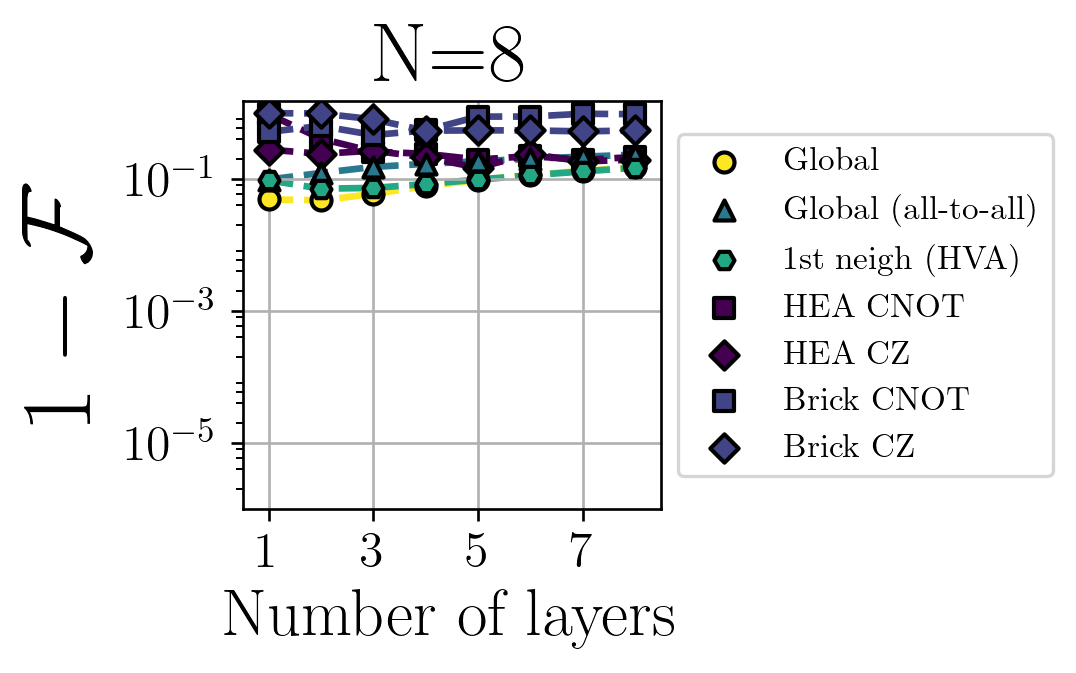

In [16]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(2.25,2.25)
M = 6
colors = plt.cm.viridis(np.linspace(0,1,M))
total_layers = np.arange(1,int(2*N/2)+1)
'''
ax.plot(xi_list[0:m],fidelity_hva,label=r'HVA',linewidth=2)
ax.plot(xi_list[0:m],fidelity_cnot,label=r'CNOT gates',linewidth=2)
ax.plot(xi_list[0:m],fidelity_cz,label=r'CZ gates',linewidth=2)
'''
'''
ax.scatter(total_layers,final_energy_hva,label=r'HVA',linewidth=1.25,marker='o',edgecolor='black', facecolor=colors[-1])
ax.plot(total_layers,final_energy_hva,linewidth=2,color=colors[-1],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_energy_cnot,label=r'CNOT',linewidth=1.25,marker='d',edgecolor='black', facecolor=colors[0])
ax.plot(total_layers,final_energy_cnot,linewidth=2,color=colors[0],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_energy_cz,label=r'CZ',linewidth=1.25,marker='D',edgecolor='black', facecolor=colors[1])
ax.plot(total_layers,final_energy_cz,linewidth=2,color=colors[1],linestyle='dashed',zorder=-1)

ax.scatter(total_layers[-1],final_energy_hva[-1],linewidth=1.25,marker='o',edgecolor='black', facecolor='white',alpha=0.65)
ax.scatter(total_layers[-1],final_energy_cnot[-1],linewidth=1.25,marker='d',edgecolor='black', facecolor='white',alpha=0.65)
ax.scatter(total_layers[-1],final_energy_cz[-1],linewidth=1.25,marker='D',edgecolor='black', facecolor='white',alpha=0.65)
'''
plt.grid()
ax.scatter(total_layers,final_state_global,label=r'Global',linewidth=1.25,marker='o',edgecolor='black', facecolor=colors[-1],zorder=10)
ax.plot(total_layers,final_state_global,linewidth=2,color=colors[-1],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_state_global_all_to_all,label=r'Global (all-to-all)',linewidth=1.25,marker='^',edgecolor='black', facecolor=colors[-4],zorder=10)
ax.plot(total_layers,final_state_global_all_to_all,linewidth=2,color=colors[-4],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_state_hva,label=r'1st neigh (HVA)',linewidth=1.25,marker='H',edgecolor='black', facecolor=colors[-3],zorder=10)
ax.plot(total_layers,final_state_hva,linewidth=2,color=colors[-3],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_state_hea_cnot,label=r'HEA CNOT',linewidth=1.25,marker='s',edgecolor='black', facecolor=colors[0],zorder=2)
ax.plot(total_layers,final_state_hea_cnot,linewidth=2,color=colors[0],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_state_hea_cz,label=r'HEA CZ',linewidth=1.25,marker='D',edgecolor='black', facecolor=colors[0],zorder=2)
ax.plot(total_layers,final_state_hea_cz,linewidth=2,color=colors[0],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_state_brick_cnot,label=r'Brick CNOT',linewidth=1.25,marker='s',edgecolor='black', facecolor=colors[1],zorder=2)
ax.plot(total_layers,final_state_brick_cnot,linewidth=2,color=colors[1],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_state_brick_cz,label=r'Brick CZ',linewidth=1.25,marker='D',edgecolor='black', facecolor=colors[1],zorder=2)
ax.plot(total_layers,final_state_brick_cz,linewidth=2,color=colors[1],linestyle='dashed',zorder=-1)

ax.set_yscale('log')



#ax.set_xlim([3.2,0.2])
ax.set_title(r'N={}'.format(N),fontsize=25)
ax.set_xlabel(r'Number of layers',fontsize=20)
ax.set_ylabel(r"$1-\mathcal{F}$",fontsize=30)
ax.tick_params(axis='both', labelsize=15)
#restore_minor_ticks_log_plot(ax)
from matplotlib import ticker as mticker
ax.yaxis.set_major_locator(mticker.LogLocator(numticks=999))
ax.yaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs=(.2, .4, .6, .8)))
ax.set_yticks([1e-1,1e-3,1e-5])
ax.set_yticklabels([r'$10^{-1}$',r'$10^{-3}$',r'$10^{-5}$'])
#ax.set_yticks([1e-0,1e-2,1e-4])
#ax.set_yticklabels([r'$10^{0}$',r'$10^{-2}$',r'$10^{-4}$'])
ax.set_xticks([1,3,5,7])
ax.set_xticklabels([r'$1$',r'$3$',r'$5$',r'$7$'])
ax.set_xlim([0.5,2*N/2+0.5])
ax.set_ylim([1e-6,1.5])

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1., box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))#ax.legend(loc=6,fontsize=12)
#plt.setp(ax, ylim=ax1.get_ylim())

plt.savefig("/home/ctabares/variational_long_range-main/paper/figures/noise/final_state_infidelity_noisy_N={:}_gamma1={:}_gamma2={}.pdf".format(N,gamma1,gamma2),bbox_inches='tight',dpi=600)

In [17]:
import pickle

with open(f'/home/ctabares/variational_long_range-main/paper/final_states_noise_N={N}_gamma1={gamma1}_gamma2={gamma2}.p', 'wb') as fp:
    pickle.dump(final_states, fp)


In [ ]:
print('Finished!!')

In [35]:
import pickle

N=12
gamma1 = 1e-5
gamma2 = 5*1e-4

with open(f'/home/ctabares/variational_long_range-main/paper/noise_data/final_states_noise_N={N}_gamma1={gamma1}_gamma2={gamma2}.p', 'rb') as fp:
    final_states = pickle.load(fp)

In [36]:
final_state_global = final_states[0]
final_state_brick_cnot = final_states[1]
final_state_brick_cz = final_states[2]
final_state_hea_cnot = final_states[3]
final_state_hea_cz = final_states[4]
final_state_hva = final_states[5]
final_state_global_all_to_all = final_states[6]

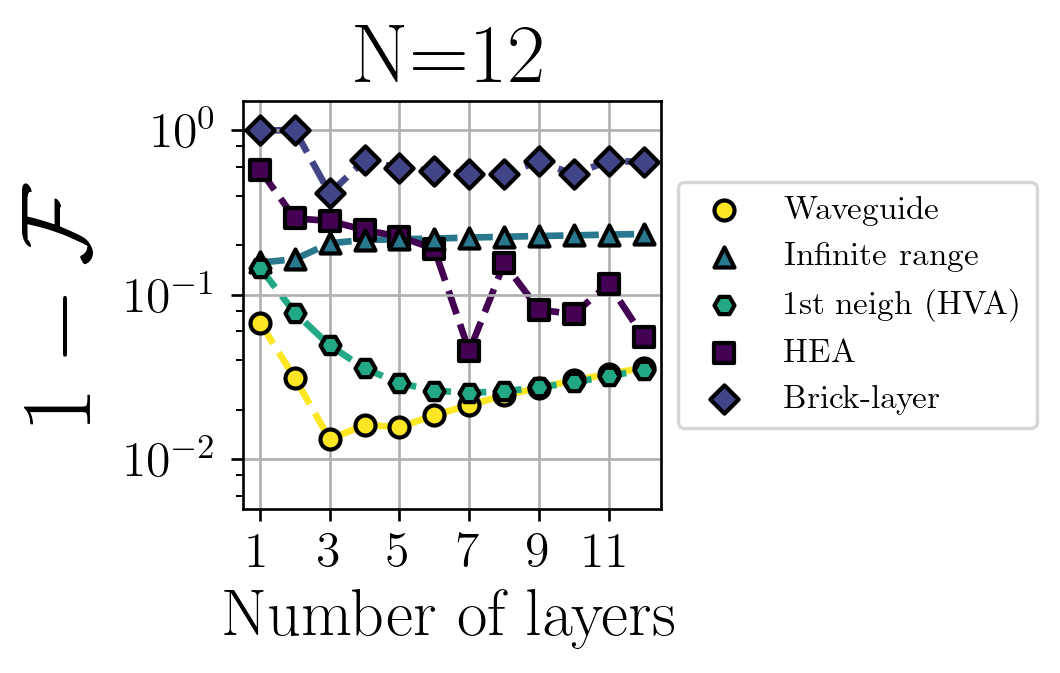

In [37]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(2.25,2.25)
M = 6
colors = plt.cm.viridis(np.linspace(0,1,M))
total_layers = np.arange(1,int(2*N/2)+1)
'''
ax.plot(xi_list[0:m],fidelity_hva,label=r'HVA',linewidth=2)
ax.plot(xi_list[0:m],fidelity_cnot,label=r'CNOT gates',linewidth=2)
ax.plot(xi_list[0:m],fidelity_cz,label=r'CZ gates',linewidth=2)
'''
'''
ax.scatter(total_layers,final_energy_hva,label=r'HVA',linewidth=1.25,marker='o',edgecolor='black', facecolor=colors[-1])
ax.plot(total_layers,final_energy_hva,linewidth=2,color=colors[-1],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_energy_cnot,label=r'CNOT',linewidth=1.25,marker='d',edgecolor='black', facecolor=colors[0])
ax.plot(total_layers,final_energy_cnot,linewidth=2,color=colors[0],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_energy_cz,label=r'CZ',linewidth=1.25,marker='D',edgecolor='black', facecolor=colors[1])
ax.plot(total_layers,final_energy_cz,linewidth=2,color=colors[1],linestyle='dashed',zorder=-1)

ax.scatter(total_layers[-1],final_energy_hva[-1],linewidth=1.25,marker='o',edgecolor='black', facecolor='white',alpha=0.65)
ax.scatter(total_layers[-1],final_energy_cnot[-1],linewidth=1.25,marker='d',edgecolor='black', facecolor='white',alpha=0.65)
ax.scatter(total_layers[-1],final_energy_cz[-1],linewidth=1.25,marker='D',edgecolor='black', facecolor='white',alpha=0.65)
'''
plt.grid()
ax.scatter(total_layers,final_state_global,label=r'Waveguide',linewidth=1.25,marker='o',edgecolor='black', facecolor=colors[-1],zorder=10)
ax.plot(total_layers,final_state_global,linewidth=2,color=colors[-1],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_state_global_all_to_all,label=r'Infinite range',linewidth=1.25,marker='^',edgecolor='black', facecolor=colors[-4],zorder=10)
ax.plot(total_layers,final_state_global_all_to_all,linewidth=2,color=colors[-4],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_state_hva,label=r'1st neigh (HVA)',linewidth=1.25,marker='H',edgecolor='black', facecolor=colors[-3],zorder=10)
ax.plot(total_layers,final_state_hva,linewidth=2,color=colors[-3],linestyle='dashed',zorder=-1)
#ax.scatter(total_layers,final_state_hea_cnot,label=r'HEA CNOT',linewidth=1.25,marker='s',edgecolor='black', facecolor=colors[0],zorder=2)
#ax.plot(total_layers,final_state_hea_cnot,linewidth=2,color=colors[0],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_state_hea_cz,label=r'HEA',linewidth=1.25,marker='s',edgecolor='black', facecolor=colors[0],zorder=2)
ax.plot(total_layers,final_state_hea_cz,linewidth=2,color=colors[0],linestyle='dashed',zorder=-1)
#ax.scatter(total_layers,final_state_brick_cnot,label=r'Brick CNOT',linewidth=1.25,marker='s',edgecolor='black', facecolor=colors[1],zorder=2)
#ax.plot(total_layers,final_state_brick_cnot,linewidth=2,color=colors[1],linestyle='dashed',zorder=-1)
ax.scatter(total_layers,final_state_brick_cz,label=r'Brick-layer',linewidth=1.25,marker='D',edgecolor='black', facecolor=colors[1],zorder=2)
ax.plot(total_layers,final_state_brick_cz,linewidth=2,color=colors[1],linestyle='dashed',zorder=-1)

ax.set_yscale('log')



#ax.set_xlim([3.2,0.2])
ax.set_title(r'N={}'.format(N),fontsize=25)
ax.set_xlabel(r'Number of layers',fontsize=20)
ax.set_ylabel(r"$1-\mathcal{F}$",fontsize=30)
ax.tick_params(axis='both', labelsize=15)
#restore_minor_ticks_log_plot(ax)
from matplotlib import ticker as mticker
ax.yaxis.set_major_locator(mticker.LogLocator(numticks=999))
ax.yaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs=(.2, .4, .6, .8)))
ax.set_yticks([1e-0,1e-1,1e-2])
ax.set_yticklabels([r'$10^{0}$',r'$10^{-1}$',r'$10^{-2}$'])
#ax.set_yticks([1e-0,1e-2,1e-4])
#ax.set_yticklabels([r'$10^{0}$',r'$10^{-2}$',r'$10^{-4}$'])
ax.set_xticks([1,3,5,7,9,11])
ax.set_xticklabels([r'$1$',r'$3$',r'$5$',r'$7$',r'$9$',r'$11$'])
ax.set_xlim([0.5,2*N/2+0.5])
ax.set_ylim([5*1e-3,1.5])

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1., box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))#ax.legend(loc=6,fontsize=12)
#plt.setp(ax, ylim=ax1.get_ylim())

plt.savefig("/home/ctabares/variational_long_range-main/paper/figures/noise/final_state_infidelity_noisy_N={:}_gamma1={:}_gamma2={}_onlycz.pdf".format(N,gamma1,gamma2),bbox_inches='tight',dpi=600)